### Implementing Convolution layer

A `convolution` is a filter that passes over an image, processes it, and extracts the important features.
Let's say you have an image of a person wearing a sneaker. How would you detect that a sneaker is present in the image? In order for your program to "see" the image as a sneaker, you'll have to extract the important features, and blur the inessential features. This is called `feature mapping`.
- We need to scan every pixel in the image and then look at its neighboring pixels. You multiply the values of those pixels by the equivalent weights in a filter. 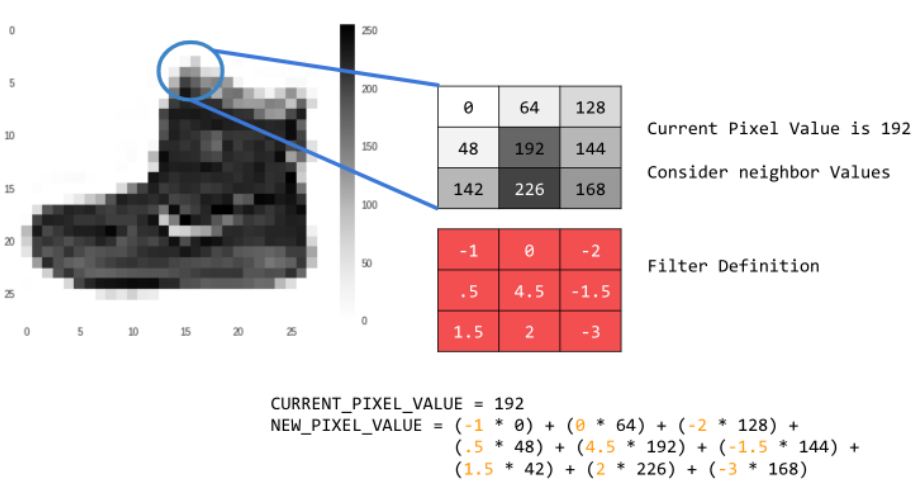

- Similar to `convolutions`, `pooling` greatly helps with detecting features. Pooling layers `reduce the overall amount of information` in an image while maintaining the `features` that are detected as present.
- Maximum (Max) Pooling -Iterate over the image and, at each point, consider the pixel and its immediate neighbors to the right, beneath, and right-beneath. Take the largest of those (hence max pooling) and load it into the new image. Thus, the new image will be one-fourth the size of the old.



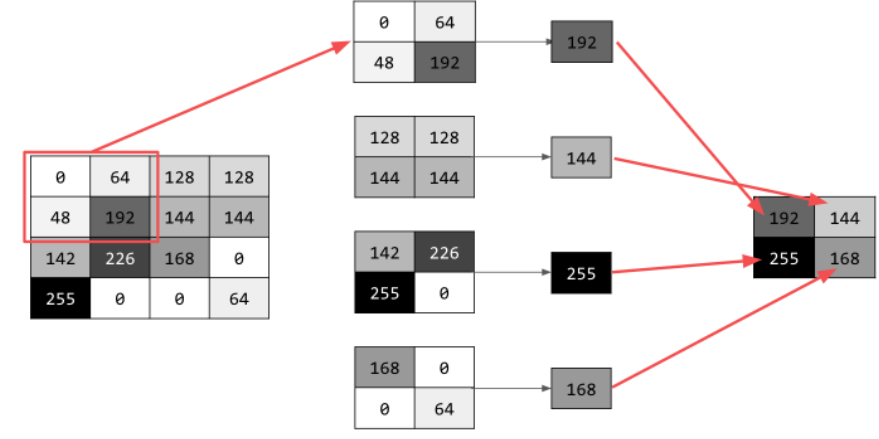

In [1]:
import os
import zipfile
import glob
import shutil

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator


In [4]:
#GPU settings
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
tf.__version__

'2.7.0'

In [66]:
#extracting rps.zip,rps-test-set.zip in data folder. Dataset can be downloaded from kaggle
cur_dir=os.getcwd()
data_dir=os.path.join(cur_dir,'data')
for j in glob.glob(os.path.join(data_dir,'rps*')):
    if os.path.isdir(j):
        print('Deleting folder..{}'.format(os.path.basename(j)))
        shutil.rmtree(j)
          
for j in glob.glob(os.path.join(data_dir,'rps*.zip')):
    print('extracting Zip..{}'.format(os.path.basename(j)))
    zip_ref = zipfile.ZipFile(j, 'r')
    zip_ref.extractall(os.path.join(cur_dir,'data'))
    zip_ref.close()
        

Deleting folder..rps
Deleting folder..rps-test-set
extracting Zip..rps-test-set.zip
extracting Zip..rps.zip


In [67]:
rock_dir = os.path.join(data_dir,'rps','rock')
paper_dir =  os.path.join(data_dir,'rps','paper')
scissors_dir =  os.path.join(data_dir,'rps','scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

total training rock images: 840
total training paper images: 840
total training scissors images: 840


In [69]:
rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

['rock01-000.png', 'rock01-001.png', 'rock01-002.png', 'rock01-003.png', 'rock01-004.png', 'rock01-005.png', 'rock01-006.png', 'rock01-007.png', 'rock01-008.png', 'rock01-009.png']
['paper01-000.png', 'paper01-001.png', 'paper01-002.png', 'paper01-003.png', 'paper01-004.png', 'paper01-005.png', 'paper01-006.png', 'paper01-007.png', 'paper01-008.png', 'paper01-009.png']
['scissors01-000.png', 'scissors01-001.png', 'scissors01-002.png', 'scissors01-003.png', 'scissors01-004.png', 'scissors01-005.png', 'scissors01-006.png', 'scissors01-007.png', 'scissors01-008.png', 'scissors01-009.png']


In [118]:
l_index = 3
num_files=2
# take 2 files starts from specified index and display
next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[l_index:l_index+num_files]]
next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[l_index:l_index+num_files]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[l_index:l_index+num_files]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[l_index:l_index+num_files]]

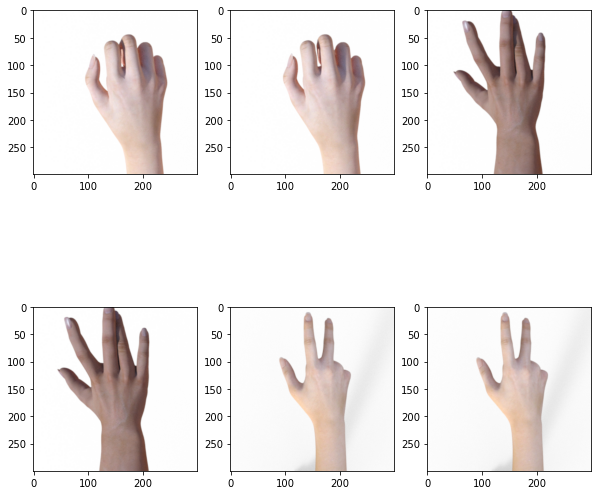

In [119]:
plt.figure(figsize=(10,10)) # specifying the overall grid size

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
    plt.subplot(num_files,3,i+1)    # the number of images in the grid is 5*5 (25)
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

### Performing DataAugmentation

In [158]:
#os.path.normpath(os.getcwd() + os.sep + os.pardir)
train_dir=os.path.normpath(rock_dir + os.sep + os.pardir)
test_dir=os.path.normpath(train_dir + os.sep + os.pardir)
test_dir=os.path.join(test_dir,'rps-test-set')


In [139]:
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validate_datagen = ImageDataGenerator(rescale = 1./255)


In [140]:
train_gen=training_datagen.flow_from_directory(train_dir,
                                     target_size=(150,150),
                                     class_mode='categorical',
                                     batch_size=125)

Found 2520 images belonging to 3 classes.


In [141]:
validate_gen=validate_datagen.flow_from_directory(test_dir,
                                                  target_size=(150,150),
                                                  class_mode='categorical',
                                                  batch_size=125)

Found 372 images belonging to 3 classes.


### Create CNN Model

In [142]:

model = tf.keras.models.Sequential([
    # input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [143]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [144]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [146]:
history = model.fit(train_gen, epochs=25, steps_per_epoch=20, validation_data = validate_gen, verbose = 1, validation_steps=3)

Epoch 1/25
20/20 [==============================] - 54s 3s/step - loss: 1.3148 - accuracy: 0.3549 - val_loss: 1.0814 - val_accuracy: 0.3333
Epoch 2/25
20/20 [==============================] - 61s 3s/step - loss: 1.0524 - accuracy: 0.4534 - val_loss: 0.8725 - val_accuracy: 0.5699
Epoch 3/25
20/20 [==============================] - 60s 3s/step - loss: 0.9843 - accuracy: 0.5044 - val_loss: 0.6174 - val_accuracy: 0.9462
Epoch 4/25
20/20 [==============================] - 62s 3s/step - loss: 1.0468 - accuracy: 0.5783 - val_loss: 1.4890 - val_accuracy: 0.3737
Epoch 5/25
20/20 [==============================] - 60s 3s/step - loss: 0.8438 - accuracy: 0.6509 - val_loss: 0.6557 - val_accuracy: 0.5403
Epoch 6/25
20/20 [==============================] - 59s 3s/step - loss: 0.6819 - accuracy: 0.6927 - val_loss: 0.4186 - val_accuracy: 0.9355
Epoch 7/25
20/20 [==============================] - 62s 3s/step - loss: 0.5772 - accuracy: 0.7556 - val_loss: 0.3330 - val_accuracy: 0.9570
Epoch 8/25
20/20 [==

In [152]:
model.save("cnn_rps.h5")

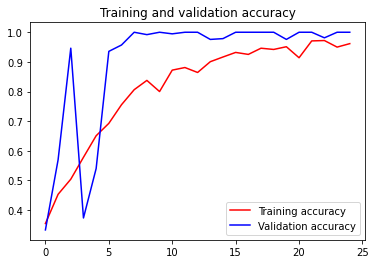

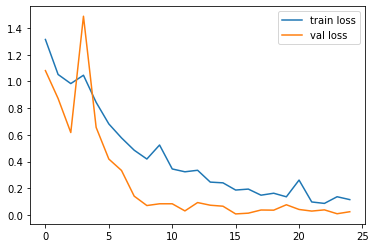

In [151]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
#plt.figure()


plt.show()
#plt.savefig('AccVal_acc')
# plot the loss
plt.plot(epochs,history.history['loss'], label='train loss')
plt.plot(epochs,history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

In [154]:
from tensorflow.keras.models import load_model
# load model
model1 = load_model('cnn_rps.h5')

In [155]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [159]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_dir1=os.path.join(test_dir,'testscissors04-21.png')
test_image = image.load_img(test_dir1, target_size = (150,150))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model1.predict(test_image)

In [168]:
print(result)
dict_1={0:'Rock',1:'Paper',2:'Scissors'}
print('predicted output is: {}'.format(dict_1[np.argmax(result)]))

[[3.0910046e-04 1.3303277e-04 9.9955779e-01]]
predicted output is: Scissors


In [ ]:
tf.keras.optimizers.RMSprop()